In [405]:
import pandas as pd
import pylab as pl
import numpy as np
pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb_slides.mpstyle")
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/Users/fbb/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['full']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [406]:
particles = pd.read_csv("particles.csv", na_values="--")
particles.head()

,Name,mean charge,mean spin,Mass,mean lifetime,Primary Decay Mode(s),Ultimate Decay Products
0,photon,0,1.0,0,stable,NaN,NaN
1,graviton,0,2.0,0,stable,NaN,NaN
2,nu-e,0,0.5,small,stable,NaN,NaN
3,anti-nu-e,0,0.5,small,stable,NaN,NaN
4,nu-mu,0,0.5,small,stable,NaN,NaN


In [407]:
particles.Mass

0         0
1         0
2     small
3     small
4     small
5     small
6     small
7     small
8     0.511
9     0.511
10      106
11      106
12      135
13      140
14      140
15      494
16      494
17      498
18      498
19      547
20      770
21      770
22      770
23      782
24      892
25      892
26      896
27      896
28      938
29      938
      ...  
44     1230
45     1230
46     1230
47     1230
48     1230
49     1230
50     1315
51     1315
52     1321
53     1321
54     1383
55     1383
56     1384
57     1384
58     1387
59     1387
60     1532
61     1532
62     1535
63     1535
64     1672
65     1672
66     1777
67     1777
68    80000
69    80000
70    91000
71    large
72    large
73    large
Name: Mass, Length: 74, dtype: object

In [408]:
particles["mean lifetime"] = np.log10(particles["mean lifetime"].replace(
    {"stable":1e5, "?":np.nan, "8.9E+ 02":"8.9E+02"}).astype(float))

In [409]:
particles["Primary Decay Mode(s)"]

0                              NaN
1                              NaN
2                              NaN
3                              NaN
4                              NaN
5                              NaN
6                              NaN
7                              NaN
8                              NaN
9                              NaN
10    electron + anti-nu-e + nu-mu
11    positron + nu-e + anti-nu-mu
12                 photon + photon
13                 mu-+ anti-nu-mu
14                    mu-+ + nu-mu
15                 mu-+ anti-nu-mu
16                     mu+ + nu-mu
17                       pi+ + pi-
18                 pi0 + pi0 + pi0
19                 photon + photon
20                        pi-+ pi0
21             pi+ + pi-or pi0+pi0
22                       pi+ + pi0
23                  pi+ + pi-+ pi0
24               K0 + pi-or K-+pi0
25         anti-K0 + pi+ or K+=pi0
26                        K0 + pi0
27                   anti-K0 + pi0
28                  

In [410]:
particles["mean lifetime"] = particles[["mean lifetime"]].fillna(
    particles["mean lifetime"].mean())

In [411]:
particles["Mass"] = np.log10(particles["Mass"].replace(
    {"small":1e-6, "large":1e6, "0":1e-7}).astype(float))

In [412]:
particles.describe()

,mean charge,mean spin,Mass,mean lifetime
count,74.000000,74.000000,74.000000,74.000000
mean,0.000000,0.797297,2.077082,-12.932056
std,0.793812,0.548466,3.069916,10.422838
min,-2.000000,0.000000,-7.000000,-24.585027
25%,-1.000000,0.500000,2.707419,-22.744727
50%,0.000000,0.500000,3.075182,-12.932056
75%,1.000000,1.500000,3.140822,-7.668975
max,2.000000,2.000000,6.000000,5.000000


In [413]:
particles["mean charge"]


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8    -1
9     1
10   -1
11    1
12    0
13   -1
14    1
15   -1
16    1
17    0
18    0
19    0
20   -1
21    0
22    1
23    0
24   -1
25    1
26    0
27    0
28   -1
29    1
     ..
44   -1
45    0
46    0
47    1
48    1
49    2
50    0
51    0
52   -1
53    1
54   -1
55    1
56    0
57    0
58   -1
59    1
60    0
61    0
62   -1
63    1
64   -1
65    1
66   -1
67    1
68    1
69   -1
70    0
71    1
72   -1
73    0
Name: mean charge, Length: 74, dtype: int64

In [414]:
particles.describe()

,mean charge,mean spin,Mass,mean lifetime
count,74.000000,74.000000,74.000000,74.000000
mean,0.000000,0.797297,2.077082,-12.932056
std,0.793812,0.548466,3.069916,10.422838
min,-2.000000,0.000000,-7.000000,-24.585027
25%,-1.000000,0.500000,2.707419,-22.744727
50%,0.000000,0.500000,3.075182,-12.932056
75%,1.000000,1.500000,3.140822,-7.668975
max,2.000000,2.000000,6.000000,5.000000


In [415]:
particles.columns

Index(['Name', 'mean charge', 'mean spin', 'Mass', 'mean lifetime',
       'Primary Decay Mode(s)', 'Ultimate Decay Products'],
      dtype='object')

In [416]:
particles["primaryCat"] = particles["Primary Decay Mode(s)"].astype("category").cat.codes
particles["ultimateCat"] = particles["Ultimate Decay Products"].astype("category").cat.codes

    #Ultimate Decay Products").

In [417]:
particles_ohe = particles[['mean charge', 'mean spin', 'Mass', 'mean lifetime']].merge(pd.get_dummies(particles[["Primary Decay Mode(s)", 
                                          "Ultimate Decay Products"]]), 
                left_index=True, right_index=True)

In [418]:
particles_ncat = particles[['mean charge', 'mean spin', 'Mass', 'mean lifetime', 
                          "primaryCat", "ultimateCat"]]

In [419]:
particles_ncat.head()

,mean charge,mean spin,Mass,mean lifetime,primaryCat,ultimateCat
0,0,1.0,-7.0,5.0,-1,-1
1,0,2.0,-7.0,5.0,-1,-1
2,0,0.5,-6.0,5.0,-1,-1
3,0,0.5,-6.0,5.0,-1,-1
4,0,0.5,-6.0,5.0,-1,-1


In [420]:
particles_ohe.head()

,mean charge,mean spin,Mass,mean lifetime,Primary Decay Mode(s)_K+ + K-or K0 + anti-K0,Primary Decay Mode(s)_K0 + pi-or K-+pi0,Primary Decay Mode(s)_K0 + pi0,Primary Decay Mode(s)_Lambda + K-,Primary Decay Mode(s)_Lambda + photon,Primary Decay Mode(s)_Lambda + pi+,...,Ultimate Decay Products_anti-Proton,Ultimate Decay Products_anti-Proton + 2 positron + 2nu-e,Ultimate Decay Products_anti-Proton + electron + anti-nu-e,Ultimate Decay Products_anti-Proton + positron + nu-e,Ultimate Decay Products_electron + anti-nu-e,Ultimate Decay Products_electron + anti-nu-e + nu-mu,Ultimate Decay Products_electron + anti-nu-e + nu-tau,Ultimate Decay Products_positron + nu-e,Ultimate Decay Products_positron + nu-e + anti-nu-mu,Ultimate Decay Products_positron + nu-e + anti-nu-tau
0,0,1.0,-7.0,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2.0,-7.0,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.5,-6.0,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0.5,-6.0,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.5,-6.0,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [421]:
particles_ohe.iloc[0, 4:]
     

Primary Decay Mode(s)_K+ + K-or K0 + anti-K0                     0.0
Primary Decay Mode(s)_K0 + pi-or K-+pi0                          0.0
Primary Decay Mode(s)_K0 + pi0                                   0.0
Primary Decay Mode(s)_Lambda + K-                                0.0
Primary Decay Mode(s)_Lambda + photon                            0.0
Primary Decay Mode(s)_Lambda + pi+                               0.0
Primary Decay Mode(s)_Lambda + pi-                               0.0
Primary Decay Mode(s)_Lambda + pi0                               0.0
Primary Decay Mode(s)_Neutron + pi+                              0.0
Primary Decay Mode(s)_Neutron + pi-                              0.0
Primary Decay Mode(s)_Neutron + pi0                              0.0
Primary Decay Mode(s)_Proton + electron + anti-nu-e              0.0
Primary Decay Mode(s)_Proton + pi+                               0.0
Primary Decay Mode(s)_Proton + pi-                               0.0
Primary Decay Mode(s)_Proton + pi0

In [422]:
particles_ohe.iloc[0, :4]


mean charge      0.0
mean spin        1.0
Mass            -7.0
mean lifetime    5.0
Name: 0, dtype: float64

In [423]:
import scipy as sp
from scipy import spatial

In [424]:
particles_ohe.iloc[:,:4].head(10)

,mean charge,mean spin,Mass,mean lifetime
0,0,1.0,-7.000000,5.0
1,0,2.0,-7.000000,5.0
2,0,0.5,-6.000000,5.0
3,0,0.5,-6.000000,5.0
4,0,0.5,-6.000000,5.0
5,0,0.5,-6.000000,5.0
6,0,0.5,-6.000000,5.0
7,0,0.5,-6.000000,5.0
8,-1,0.5,-0.291579,5.0
9,1,0.5,-0.291579,5.0


In [425]:
for i in range(10):
    print(sp.spatial.distance.cityblock(particles_ohe.iloc[0,:4], particles_ohe.iloc[i,:4]))

0.0
1.0
1.5
1.5
1.5
1.5
1.5
1.5
8.208420900134712
8.208420900134712


In [426]:
for i in range(10):
    print(sp.spatial.distance.euclidean(particles_ohe.iloc[0,:4], particles_ohe.iloc[i,:4]))

0.0
1.0
1.118033988749895
1.118033988749895
1.118033988749895
1.118033988749895
1.118033988749895
1.118033988749895
6.800949270018431
6.800949270018431


In [427]:
import time 

In [428]:
now = time.time()
dists = np.zeros((30, 30))
for i in range(30):
    for j in range(i, 30):
        dists[i,j] = sp.spatial.distance.euclidean(particles_ohe.iloc[i,:4], particles_ohe.iloc[j,:4])
        dists[j,i] = dists[i,j]
print(np.round(time.time() - now, 5), "sec")

0.2918 sec


In [429]:
now = time.time()
tmp = sp.spatial.distance.pdist(particles_ohe.iloc[:30,:4].values, metric='cityblock')
print(np.round(time.time() - now, 5), "sec")

0.00098 sec


In [430]:
now = time.time()
dists = np.zeros((30, 30))
for i in range(30):
    for j in range(i, 30):
        dists[i,j] = sp.spatial.distance.jaccard(particles_ohe.iloc[i,4:], particles_ohe.iloc[j,4:])
        dists[j,i] = dists[i,j]
print(np.round(time.time() - now, 5), "sec")

0.29627 sec


/Users/fbb/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['["sans-serif"]'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


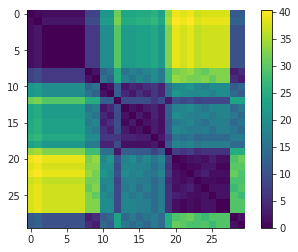

In [431]:
pl.imshow(sp.spatial.distance.squareform(tmp))
pl.colorbar()

In [432]:
now = time.time()
tmp = sp.spatial.distance.pdist(particles_ohe.iloc[:30,4:].values, 
                                metric='jaccard')
print(np.round(time.time() - now, 5), "sec")

0.0016 sec


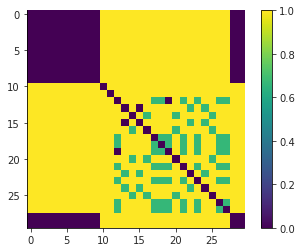

In [433]:
pl.imshow(sp.spatial.distance.squareform(tmp))
pl.colorbar()

In [434]:
def myjaccard(o1, o2):
    intersection = ((o1 > 0) * (o2 > 0)).sum()
    union = ((o1 < 0) * (o2 < 0) + (o1 < 0) * (o2 < 1) +
            (o1 < 1) * (o2 < 0)).sum() 
    return intersection / union

In [435]:
now = time.time()
sp.spatial.distance.pdist(particles_ohe.iloc[:30,4:].values, metric=myjaccard)
print(np.round(time.time() - now, 5), "sec")

0.01798 sec


/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in long_scalars
  """
/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in long_scalars
  """


In [436]:
cluster.k_means

<function sklearn.cluster.k_means_.k_means(X, n_clusters, sample_weight=None, init='k-means++', precompute_distances='auto', n_init=10, max_iter=300, verbose=False, tol=0.0001, random_state=None, copy_x=True, n_jobs=None, algorithm='auto', return_n_iter=False)>

In [437]:
from sklearn.manifold import TSNE
np.random.seed(10)
X_ncat = TSNE(n_components=2).fit_transform(particles_ncat.values)

X_ohe = TSNE(n_components=2).fit_transform(particles_ohe.values)


In [438]:
def calICVar(X, labels):
    icvar = 0
    for n in np.unique(labels):
        #print (n, X[labels == n].std() ** 2)
        icvar += np.sum((X[labels == n] - X[labels == n].mean())**2)
        #X[labels == n].var() 
    print(icvar)
    return icvar

(10, 6)
2
72796.74295199137


/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  # Remove the CWD from sys.path while we load stuff.


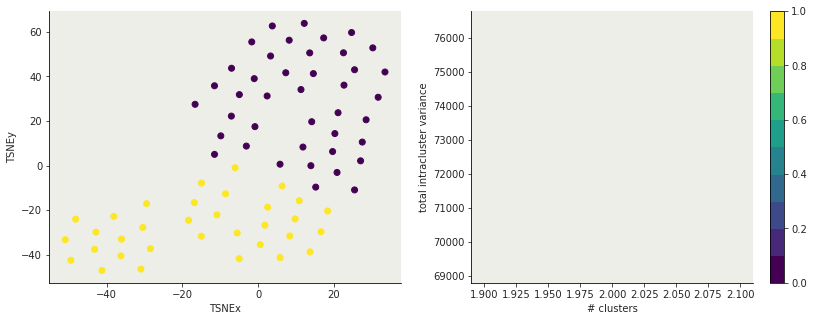

3
72568.03700480924


/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  # Remove the CWD from sys.path while we load stuff.


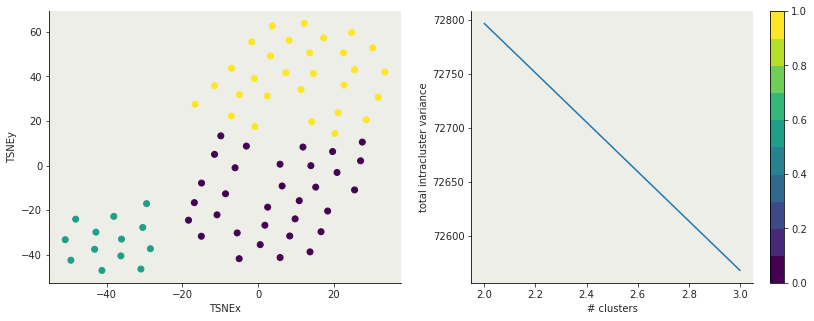

4
72071.09982899729


/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  # Remove the CWD from sys.path while we load stuff.


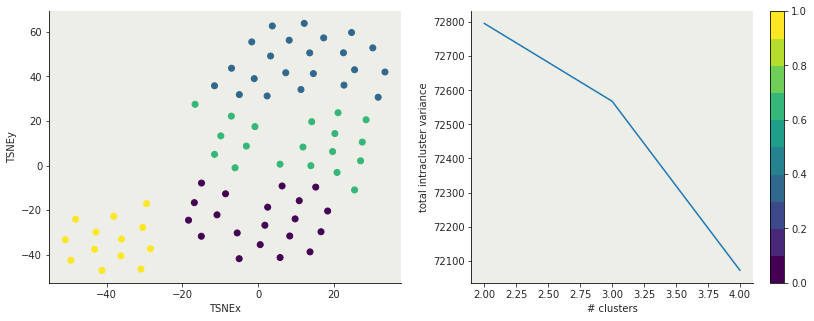

5
71819.25792214854


/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  # Remove the CWD from sys.path while we load stuff.


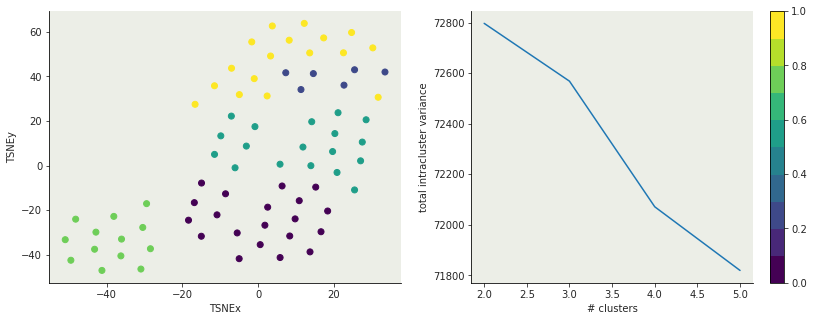

6
71667.28152269911


/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  # Remove the CWD from sys.path while we load stuff.


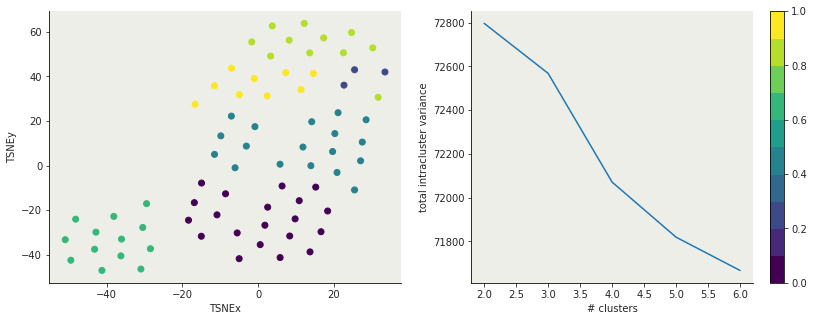

7
71606.8358369721


/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  # Remove the CWD from sys.path while we load stuff.


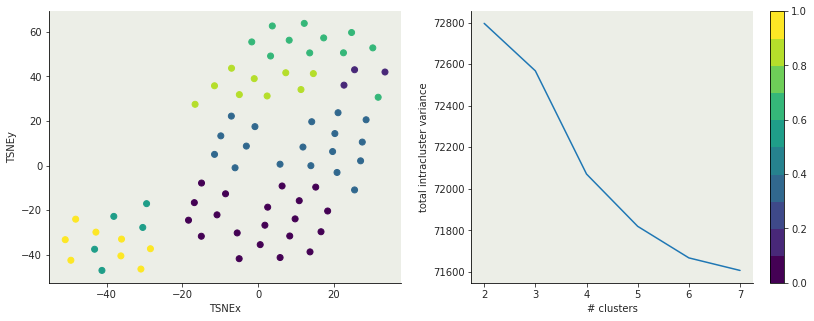

8
71600.7530485247


/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  # Remove the CWD from sys.path while we load stuff.


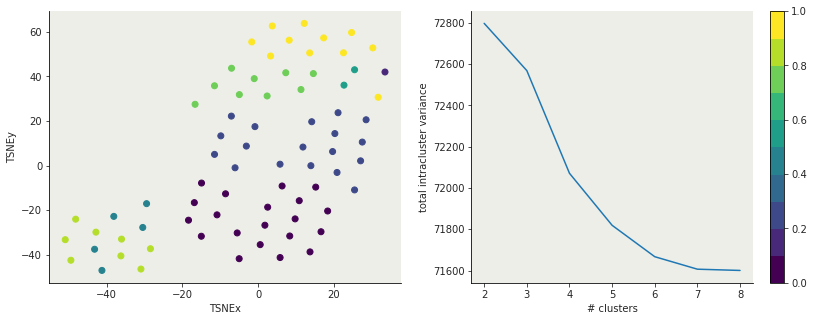

9
71641.81811503749


/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  # Remove the CWD from sys.path while we load stuff.


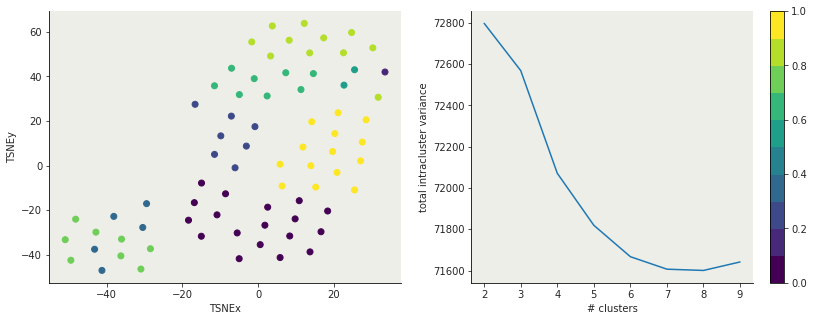

In [444]:
ncmax = 10
np.random.seed(123)
centers = np.random.randn(ncmax, 6)
print(centers.shape)
ncs = np.zeros(ncmax)
cmap = cm.get_cmap('viridis', ncmax)
from sklearn import cluster
for n in range(2,ncmax):
    print(n)
    tmp = cluster.k_means(particles_ncat.values, n, init=centers[:n,:], random_state=7)
    
    ncs[n-2] = calICVar(particles_ncat.values, tmp[1])
    fig, ax  = pl.subplots(nrows=1, ncols=2, figsize=(10,5))
    cb = ax[0].scatter(X_ncat[:,0], X_ncat[:,1], 
                       c=(tmp[1] / tmp[1].max()), cmap=cmap)
    ax[0].set_xlabel('TSNEx')
    ax[0].set_ylabel('TSNEy')
    pl.colorbar(cb)
    ax[1].plot(range(2, n+1), ncs[:n-1])
    ax[1].set_xlabel('# clusters')
    ax[1].set_ylabel('total intracluster variance')
    fig.subplots_adjust(right=1.2)
    
    pl.show()
#pl.plot(range(2,ncmax + 2), ncs)


In [440]:
particles_ncatsq = particle_ncat.copy()
particles_ncatsq[["mean charge"]] = particles_ncatsq[["mean charge"]] ** 2
particles_ncatsq[["mean spin"]] = particles_ncatsq[["mean spin"]] ** 2

2
72579.38198595188


/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  


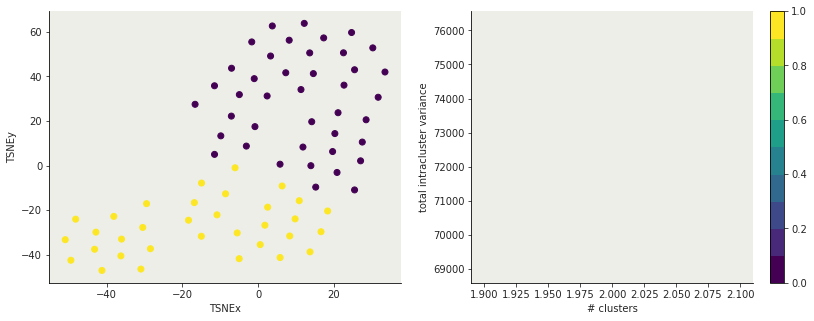

3
72326.41895555411


/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  


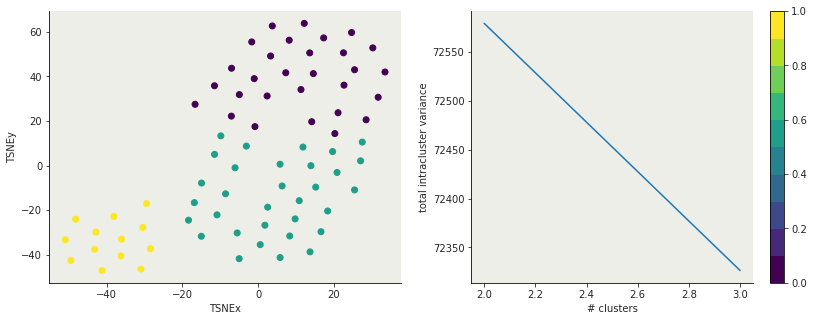

4
72132.9935752654


/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  


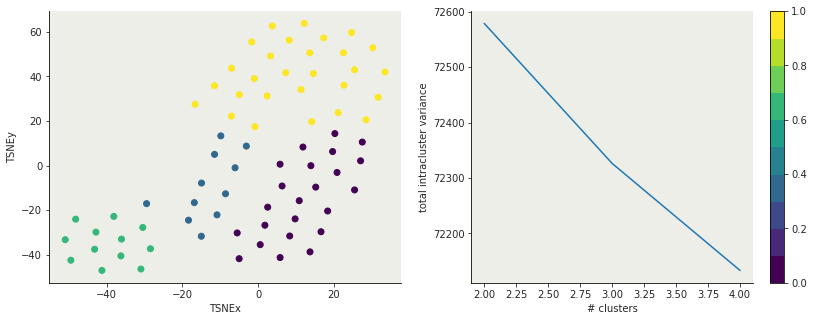

5
72057.70501923283


/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  


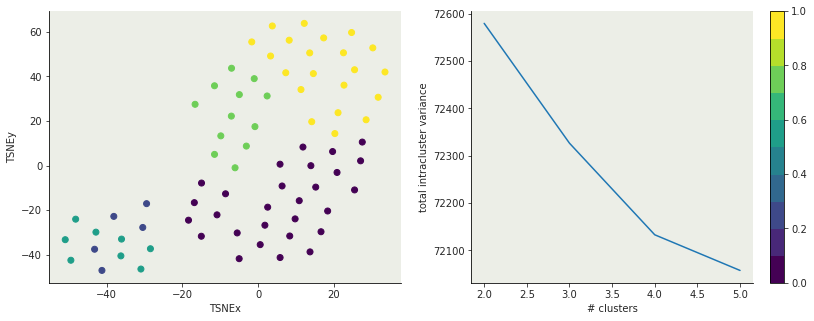

6
71643.0327429662


/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  


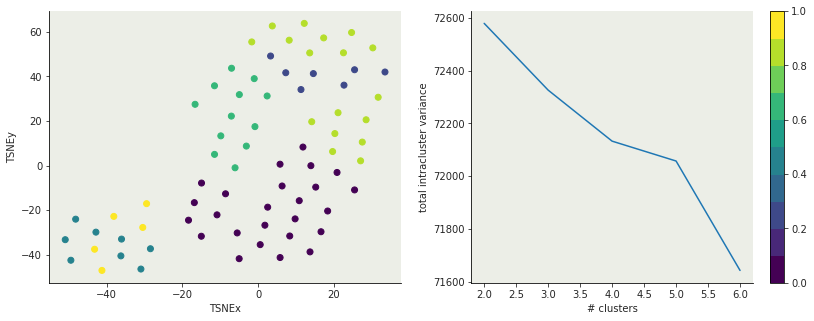

7
71536.70556870347


/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  


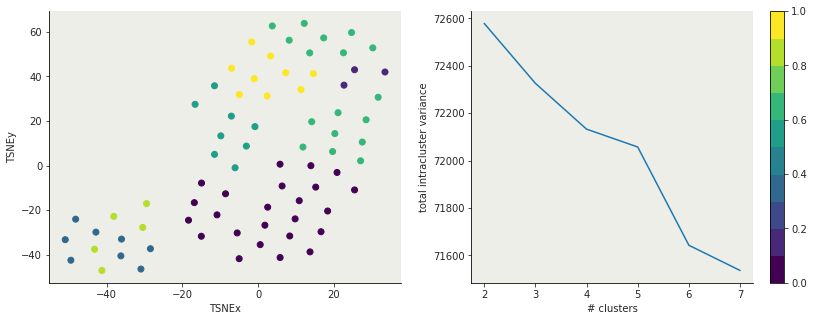

8
71431.7800298922


/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  


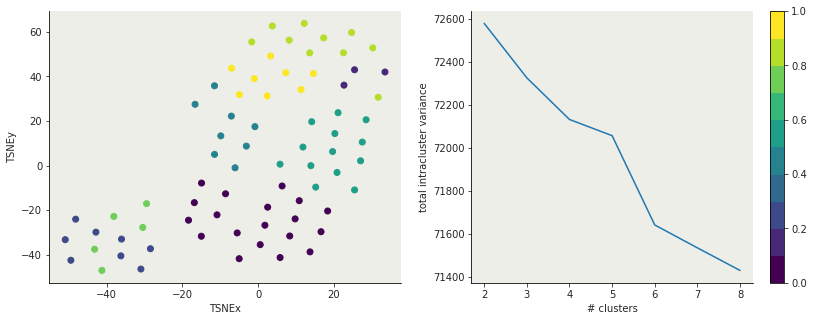

9
71395.11742248852


/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  


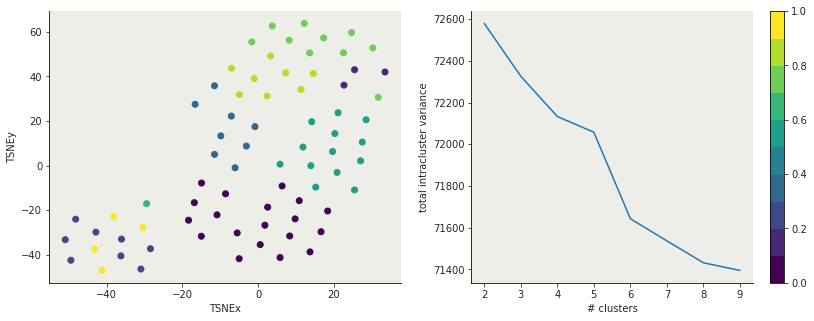

In [445]:
centers = np.random.randn(ncmax, particles_ncatsq.shape[1])
particles_ncat
ncs = np.zeros(ncmax)
cmap = cm.get_cmap('viridis', ncmax)
from sklearn import cluster
for n in range(2,ncmax):
    print(n)
    tmp = cluster.k_means(particles_ncatsq.values, n, init=centers[:n,:], random_state=7)
    
    ncs[n-2] = calICVar(particles_ncatsq.values, tmp[1])
    fig, ax  = pl.subplots(nrows=1, ncols=2, figsize=(10,5))
    cb = ax[0].scatter(X_ncat[:,0], X_ncat[:,1], 
                       c=(tmp[1] / tmp[1].max()), cmap=cmap)
    ax[0].set_xlabel('TSNEx')
    ax[0].set_ylabel('TSNEy')
    pl.colorbar(cb)
    ax[1].plot(range(2, n+1), ncs[:n-1])
    ax[1].set_xlabel('# clusters')
    ax[1].set_ylabel('total intracluster variance')
    fig.subplots_adjust(right=1.2)
    
    pl.show()
#pl.plot(range(2,ncmax + 2), ncs)


/Users/fbb/anaconda3/lib/python3.7/site-packages/pandas/plotting/_core.py:202: UserWarning: 'color' and 'colormap' cannot be used simultaneously. Using 'color'
  warnings.warn("'color' and 'colormap' cannot be used "


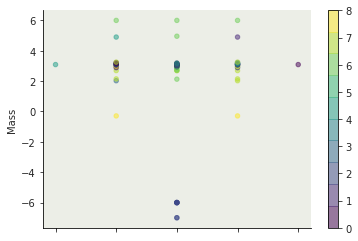

In [442]:
particles.plot(x="mean charge", y="Mass", kind='scatter', 
               color=tmp[1], cmap=cmap, alpha=0.5)


2
21433.267636363664


/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  import sys


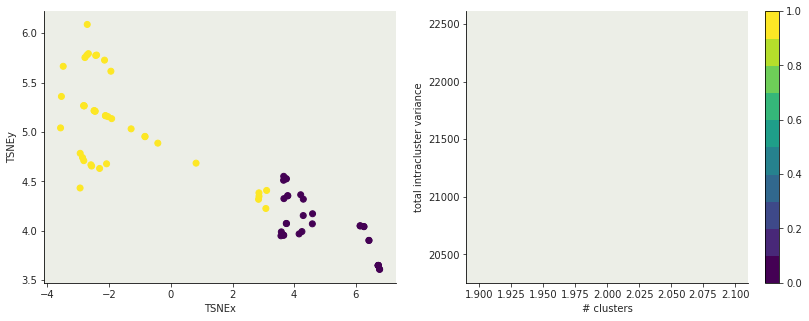

3
21422.977882342246


/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  import sys


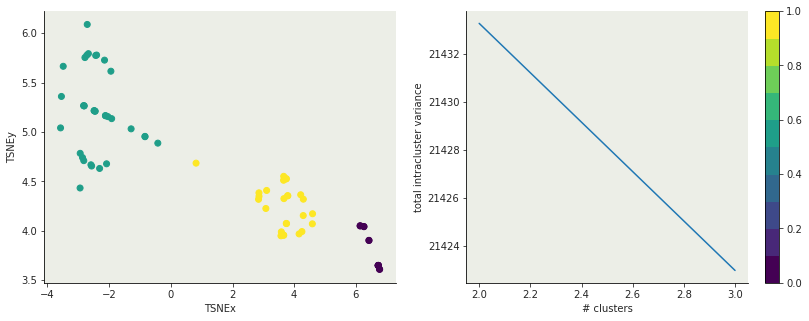

4
21421.92738803261


/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  import sys


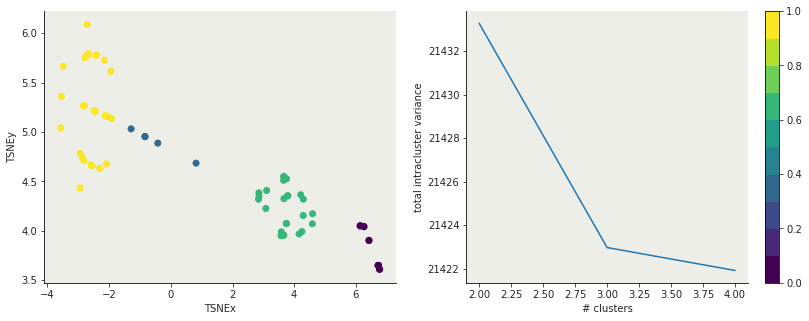

5
21419.020104049145


/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  import sys


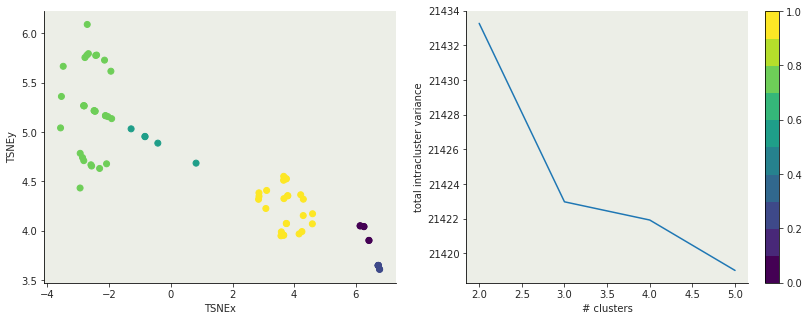

6
21419.675149935894


/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  import sys


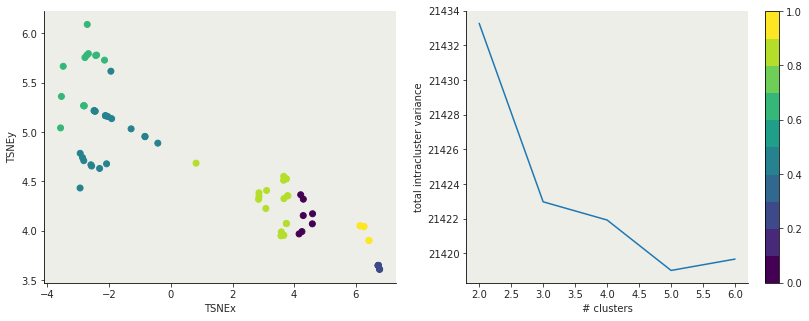

7
21418.540463631347


/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  import sys


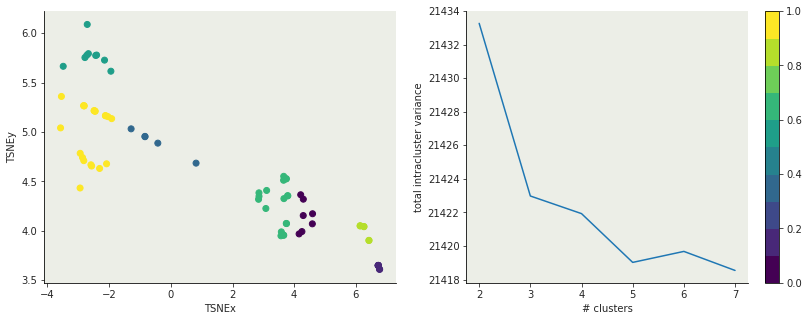

8
21419.95988674471


/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  import sys


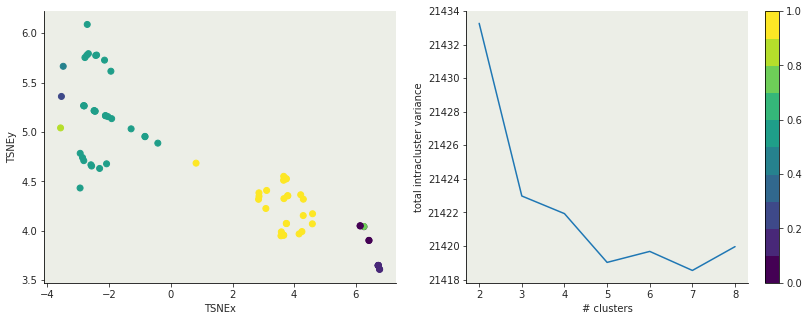

9
21418.917984107393


/Users/fbb/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  import sys


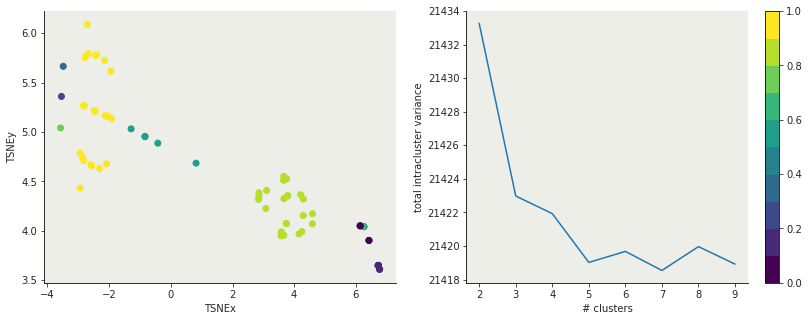

In [443]:
centers = np.random.randn(ncmax, particles_ohe.values.shape[1])

ncs = np.zeros(ncmax)
from sklearn import cluster
for n in range(2,ncmax):
    print(n)
    tmp = cluster.k_means(particles_ohe.values, n, init=centers[:n,:])
    
    ncs[n-2] = calICVar(particles_ohe.values, tmp[1])
    fig, ax  = pl.subplots(nrows=1, ncols=2, figsize=(10,5))
    cb = ax[0].scatter(X_ohe[:,0], X_ohe[:,1], 
                       c=(tmp[1] / tmp[1].max()), cmap=cmap)
    ax[0].set_xlabel('TSNEx')
    ax[0].set_ylabel('TSNEy')
    pl.colorbar(cb)
    ax[1].plot(range(2, n+1), ncs[:n-1])
    ax[1].set_xlabel('# clusters')
    ax[1].set_ylabel('total intracluster variance')
    fig.subplots_adjust(right=1.2)
    
    pl.show()
#pl.plot(range(2,ncmax + 2), ncs)
